In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# INTRO

In [82]:
train.index.max()

1032

In [2]:
train = pd.read_csv("./logs/monitor.csv", index_col=False, header=1)
train.head()

r    l          t  c          f         p                               a
0 -1.0  138   2.616453  0  10.839332  2.586831  127_1_3_2_1_1_2_1_0_0_0_0_0_0_
1 -1.0  212   5.057714  0   3.593763  1.480471  196_0_1_1_4_4_5_1_0_0_0_0_0_0_
2 -1.0  162   7.046290  0   9.212995  2.697529  149_1_2_4_0_4_1_1_0_0_0_0_0_0_
3 -1.0  126   8.540595  0   8.684000  2.106545  116_2_2_2_1_0_1_2_0_0_0_0_0_0_
4 -1.0  171  10.639339  0   6.939228  2.175492  157_3_4_2_1_1_1_2_0_0_0_0_0_0_

In [3]:
val = pd.read_csv("./val_logs/monitor.csv", index_col=False, header=1)
val.index *= 2
val.head()

r    l           t  c          f         p  \
0  0.0  671   73.767400  0  48.586861  0.004023   
2  0.0  671   81.198524  0  48.586861  0.004023   
4  0.0  671   88.439899  0  48.586861  0.004023   
6  0.0  671   95.781910  0  48.586861  0.004023   
8  0.0  671  102.982416  0  48.586861  0.004023   

                                a  
0  664_0_4_0_0_0_3_0_0_0_0_0_0_0_  
2  664_0_4_0_0_0_3_0_0_0_0_0_0_0_  
4  664_0_4_0_0_0_3_0_0_0_0_0_0_0_  
6  664_0_4_0_0_0_3_0_0_0_0_0_0_0_  
8  664_0_4_0_0_0_3_0_0_0_0_0_0_0_

In [81]:
val.index.max()

499

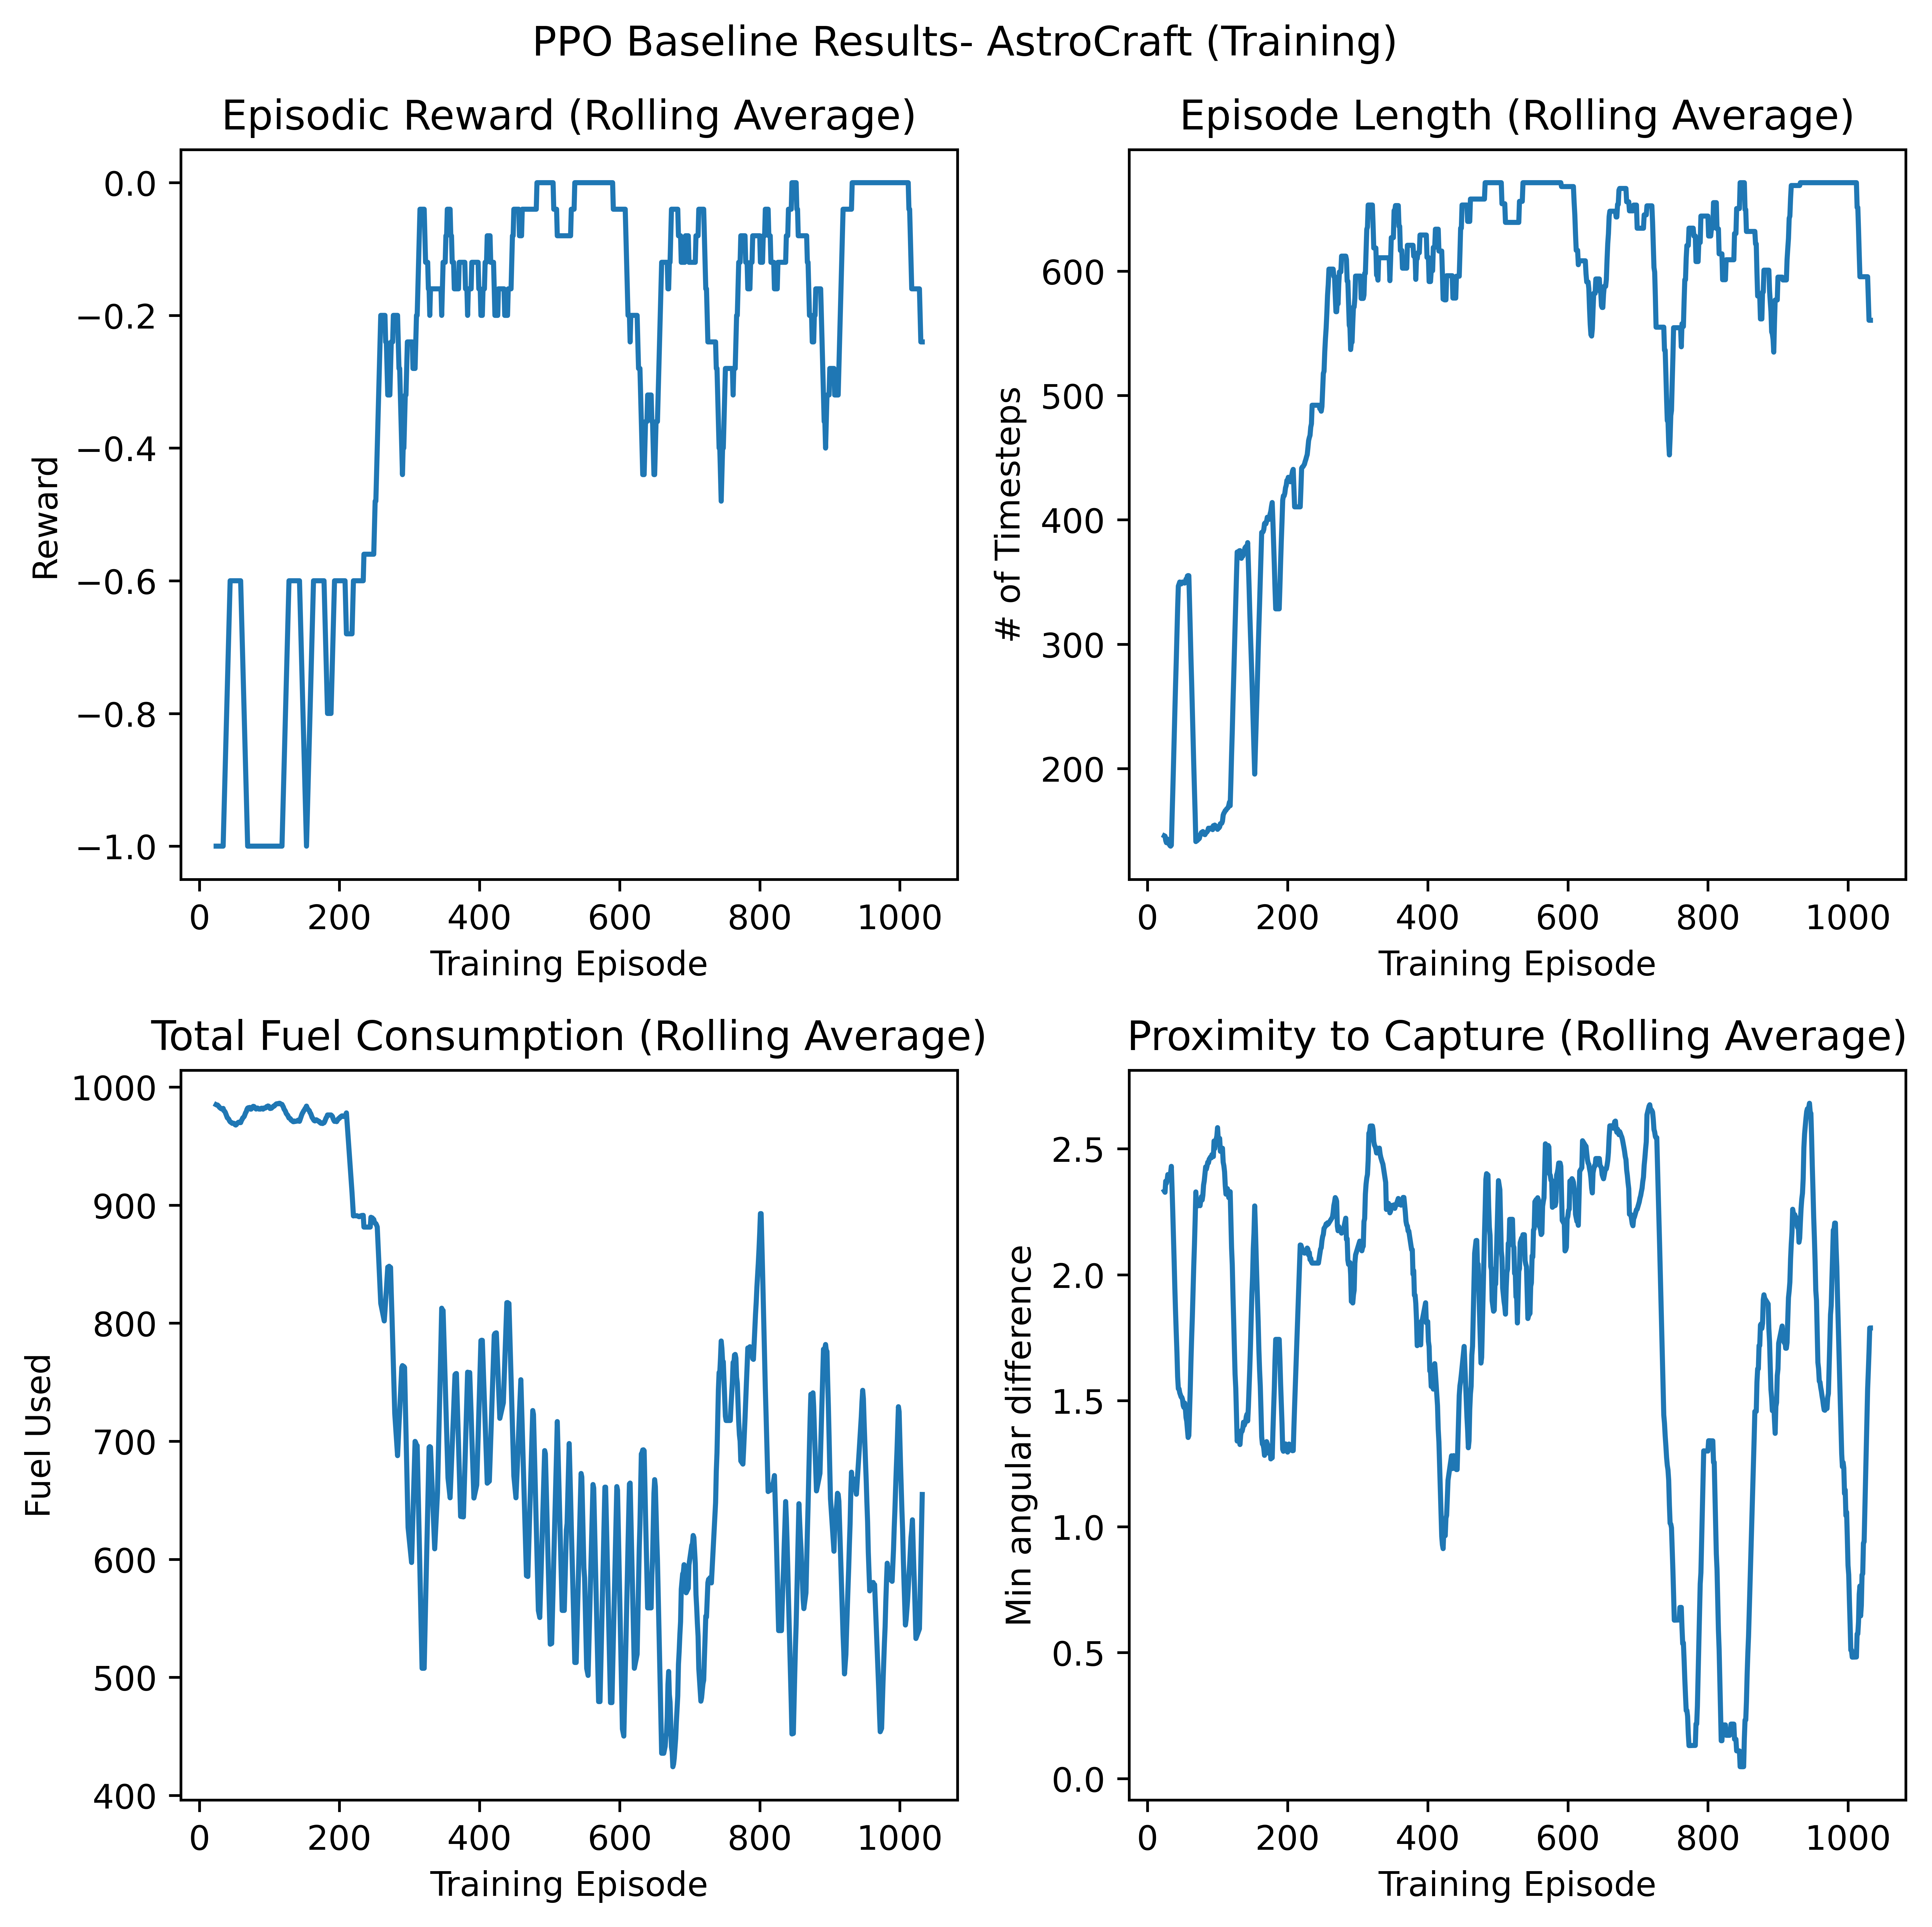

In [29]:
w = 25
fig, ax = plt.subplots(2,2)
fig.set_size_inches(8,8)
fig.set_dpi(800)
train['r'].rolling(window=w).mean().plot(title="Episodic Reward (Rolling Average)", ax=ax[0,0], xlabel="Training Episode", ylabel="Reward")
train['l'].rolling(window=w).mean().plot(title="Episode Length (Rolling Average)", ax=ax[0,1], xlabel="Training Episode", ylabel="# of Timesteps")
(1000-train['f']).rolling(window=w).mean().plot(title="Total Fuel Consumption (Rolling Average)", ax=ax[1,0], xlabel="Training Episode", ylabel="Fuel Used")
train['p'].rolling(window=w).mean().plot(title="Proximity to Capture (Rolling Average)", ax=ax[1,1], xlabel="Training Episode", ylabel="Min angular difference")

plt.suptitle("PPO Baseline Results- AstroCraft (Training)")
plt.tight_layout()


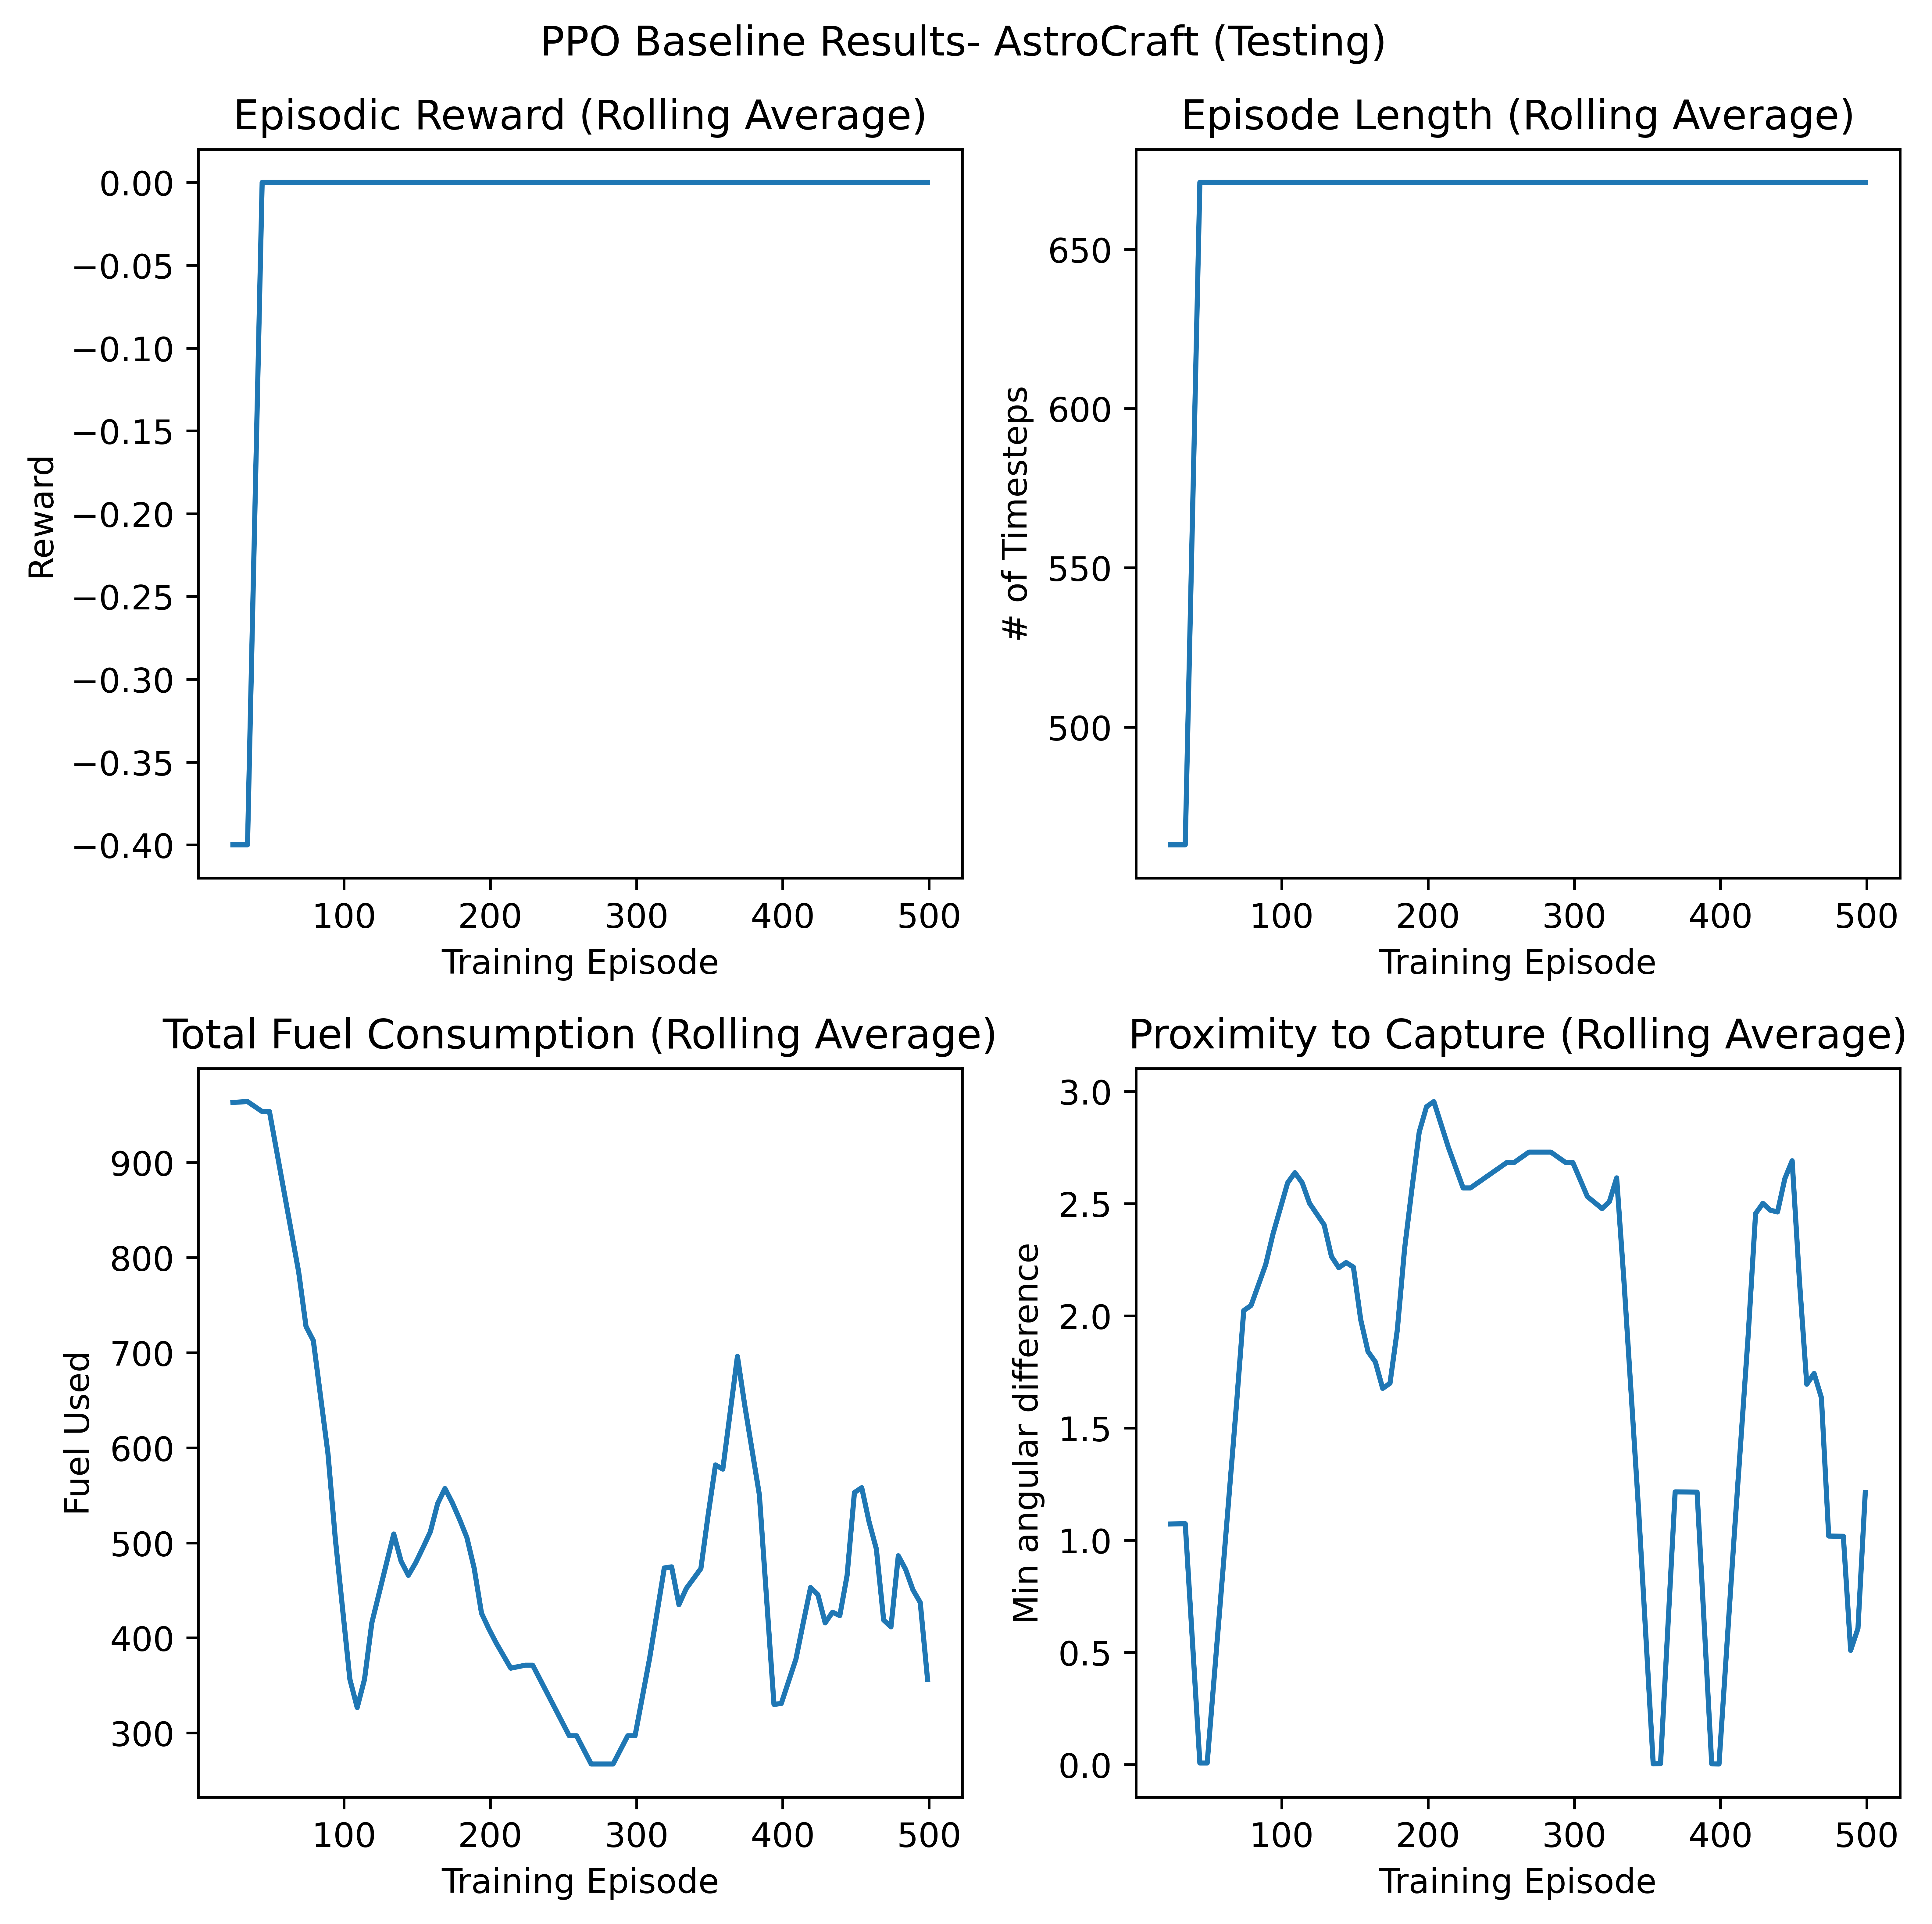

In [33]:
w = 25
fig, ax = plt.subplots(2,2)
fig.set_size_inches(8,8)
fig.set_dpi(800)
val['r'].rolling(window=w).mean().plot(title="Episodic Reward (Rolling Average)", ax=ax[0,0], xlabel="Training Episode", ylabel="Reward")
val['l'].rolling(window=w).mean().plot(title="Episode Length (Rolling Average)", ax=ax[0,1], xlabel="Training Episode", ylabel="# of Timesteps")
(1000-val['f']).rolling(window=w).mean().plot(title="Total Fuel Consumption (Rolling Average)", ax=ax[1,0], xlabel="Training Episode", ylabel="Fuel Used")
val['p'].rolling(window=w).mean().plot(title="Proximity to Capture (Rolling Average)", ax=ax[1,1], xlabel="Training Episode", ylabel="Min angular difference")

plt.suptitle("PPO Baseline Results- AstroCraft (Testing)")
plt.tight_layout()

# Rewards During Training

<Axes: >

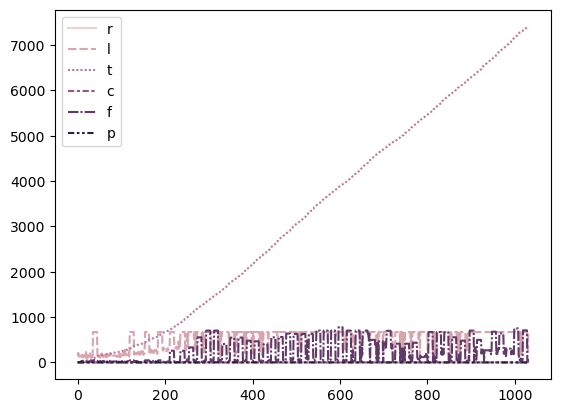

In [12]:
sns.lineplot(train, palette=sns.cubehelix_palette())

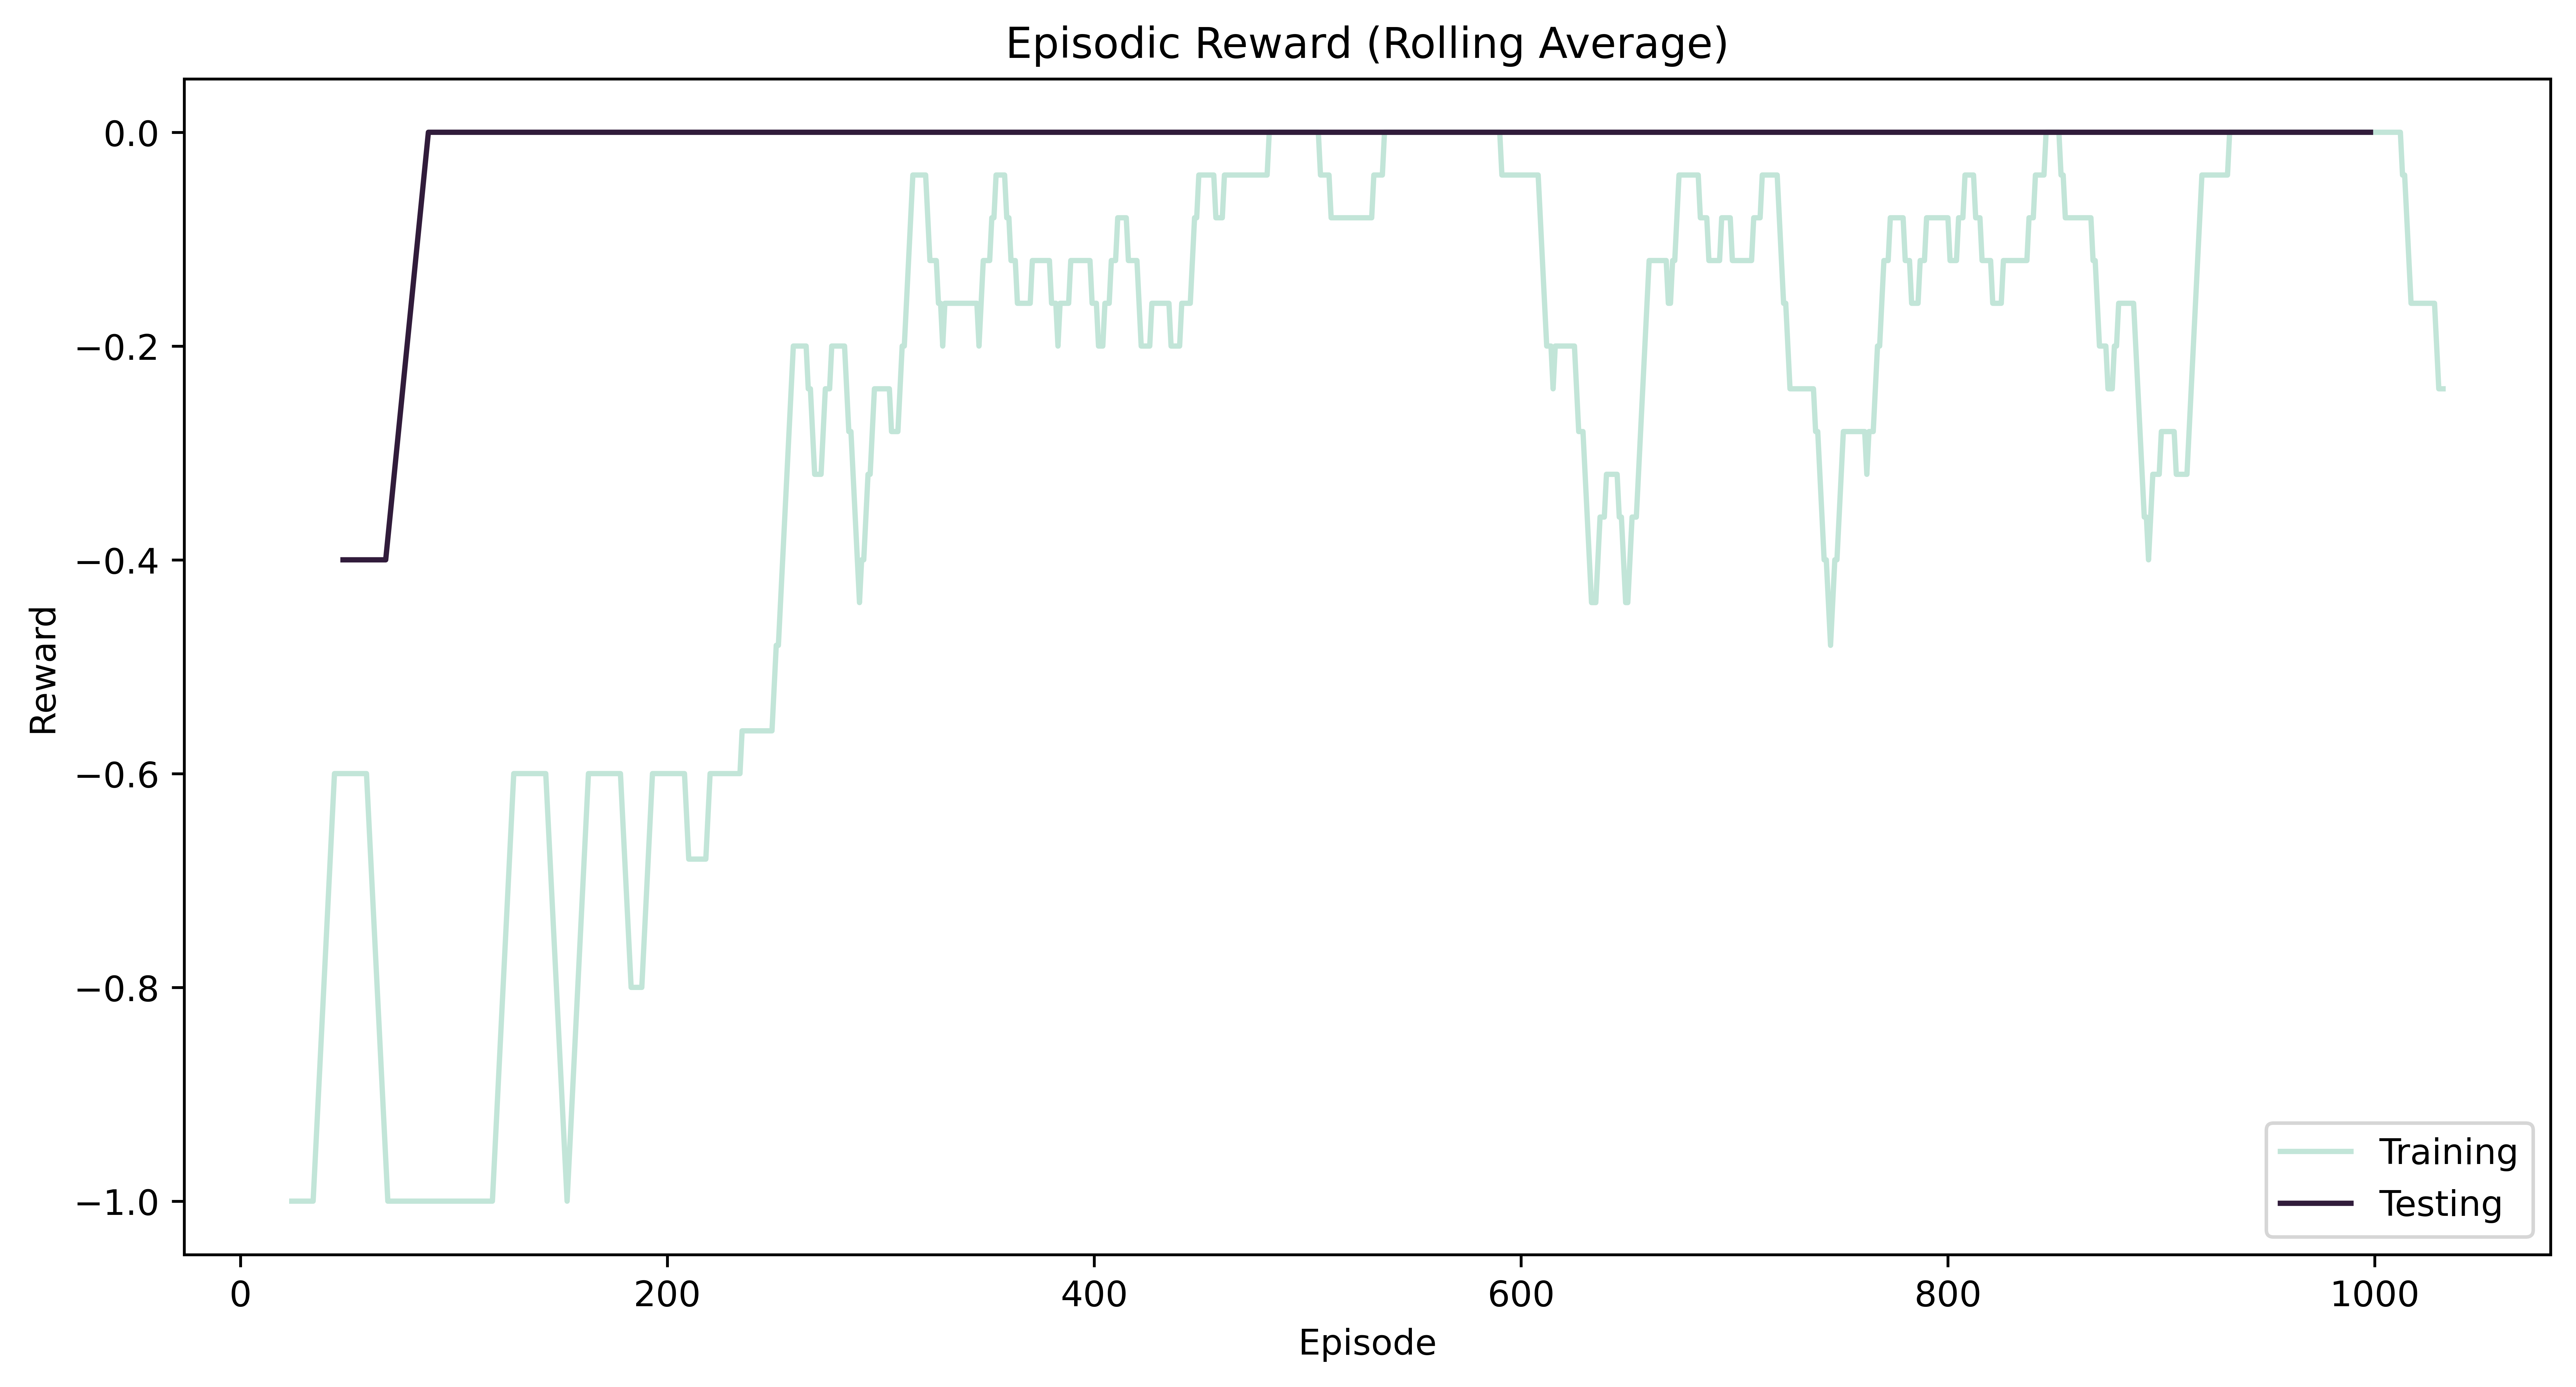

In [37]:
fig, ax = plt.subplots()
fig.set_dpi(800)
fig.set_size_inches(12,6)
w = 25

# Apply cubehelix palette
sns.set_palette("cubehelix")

# Create the rolling averages
train_rolling = train['r'].rolling(window=w).mean()
val_rolling = val['r'].rolling(window=w).mean()

# Combine the data for seaborn
combined_data = pd.DataFrame({
    'Episode': range(len(train_rolling)),
    'Training': train_rolling,
    'Testing': val_rolling
}).melt(id_vars=['Episode'], value_vars=['Training', 'Testing'], var_name='Type', value_name='Reward')

# Apply the cubehelix palette explicitly
palette = sns.cubehelix_palette( start = .5, rot = -.5, n_colors=2, as_cmap=False)

# Plot using seaborn lineplot with the cubehelix palette
sns.lineplot(data=combined_data, x='Episode', y='Reward', hue='Type', palette=palette, ax=ax)

# Set title and labels
ax.set_title("Episodic Reward (Rolling Average)")
ax.set_xlabel("Episode")
ax.set_ylabel("Reward")

# Display legend
ax.legend()

# Show plot
plt.show()

# Fuel Consumption

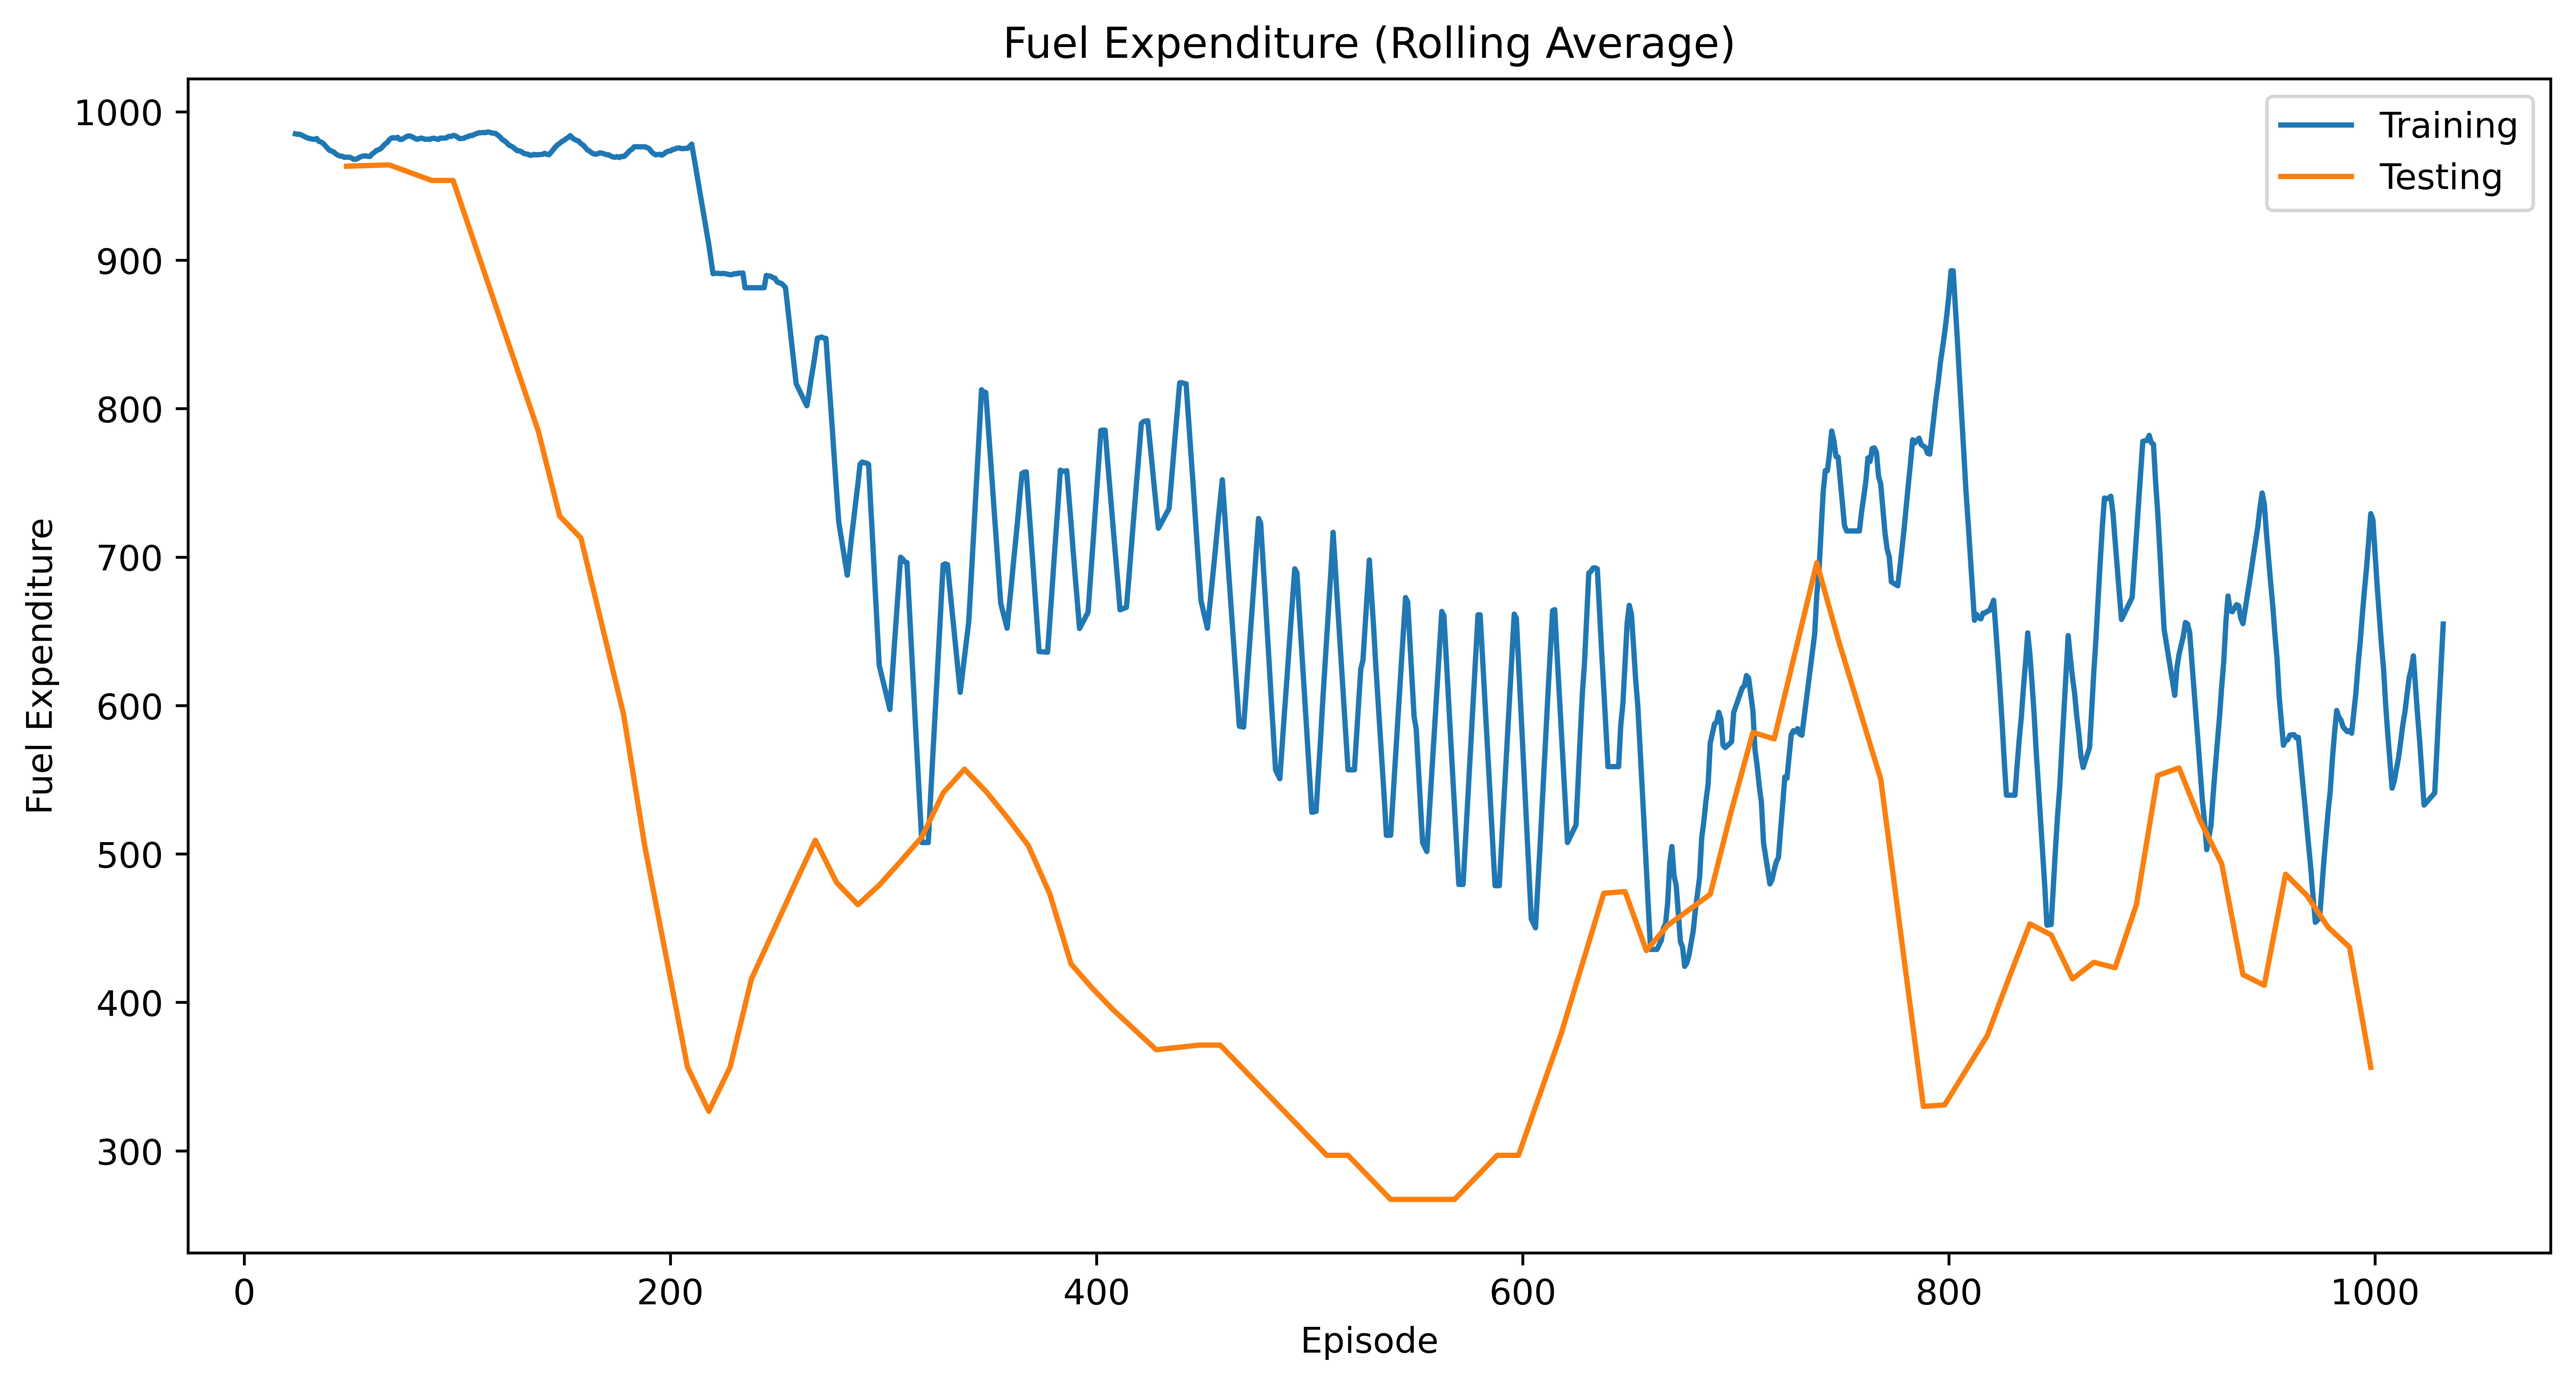

In [90]:
fig, ax = plt.subplots()
fig.set_dpi(800)
fig.set_size_inches(12,6)
w = 25

(1000-train['f']).rolling(window=w).mean().plot(ax=ax, title="Fuel Expenditure (Rolling Average)", xlabel="Episode", ylabel="Fuel Expenditure", label='Training')
(1000-val['f']).rolling(window=w).mean().plot(ax=ax, title="Fuel Expenditure (Rolling Average)", xlabel="Episode", ylabel="Fuel Expenditure", label="Testing")
ax.legend()

# Calculating action frequencies

In [17]:
action_freqs_train = train['a'].to_list()

In [18]:
def separate_action_freqs(actions):
    freqs = {i:[] for i in range(14)}
    for ep in actions:
        for i, f in enumerate(ep.split("_")[:-1]):
            freqs[i].append(int(f))
            
    return pd.DataFrame(freqs)

train_freqs = separate_action_freqs(action_freqs_train)

In [19]:
train_freqs

0   1   2   3   4   5   6   7   8   9   10  11  12  13
0     127   1   3   2   1   1   2   1   0   0   0   0   0   0
1     196   0   1   1   4   4   5   1   0   0   0   0   0   0
2     149   1   2   4   0   4   1   1   0   0   0   0   0   0
3     116   2   2   2   1   0   1   2   0   0   0   0   0   0
4     157   3   4   2   1   1   1   2   0   0   0   0   0   0
...   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1028  666   0   0   2   0   2   0   0   1   0   0   0   0   0
1029  217   0   1   2   4   5   4   1   0   0   0   0   0   0
1030  217   1   2   1   4   1   4   3   0   0   0   0   0   0
1031  660   0   2   2   1   3   2   0   1   0   0   0   0   0
1032  658   0   2   2   4   3   2   0   0   0   0   0   0   0

[1033 rows x 14 columns]

In [59]:
import seaborn as sns

/tmp/ipykernel_871249/3086789617.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_0, ax=ax[0], palette=palette)
/tmp/ipykernel_871249/3086789617.py:13: UserWarning: The palette list has more values (14) than needed (1), which may not be intended.
  sns.boxplot(data=data_0, ax=ax[0], palette=palette)
/tmp/ipykernel_871249/3086789617.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=data_1_13, ax=ax[1], palette=palette)
/tmp/ipykernel_871249/3086789617.py:14: UserWarning: The palette list has more values (14) than needed (13), which may not be intended.
  sns.boxplot(x='variable', y='value', data=data_1_13, ax=ax[1], palette=palette)


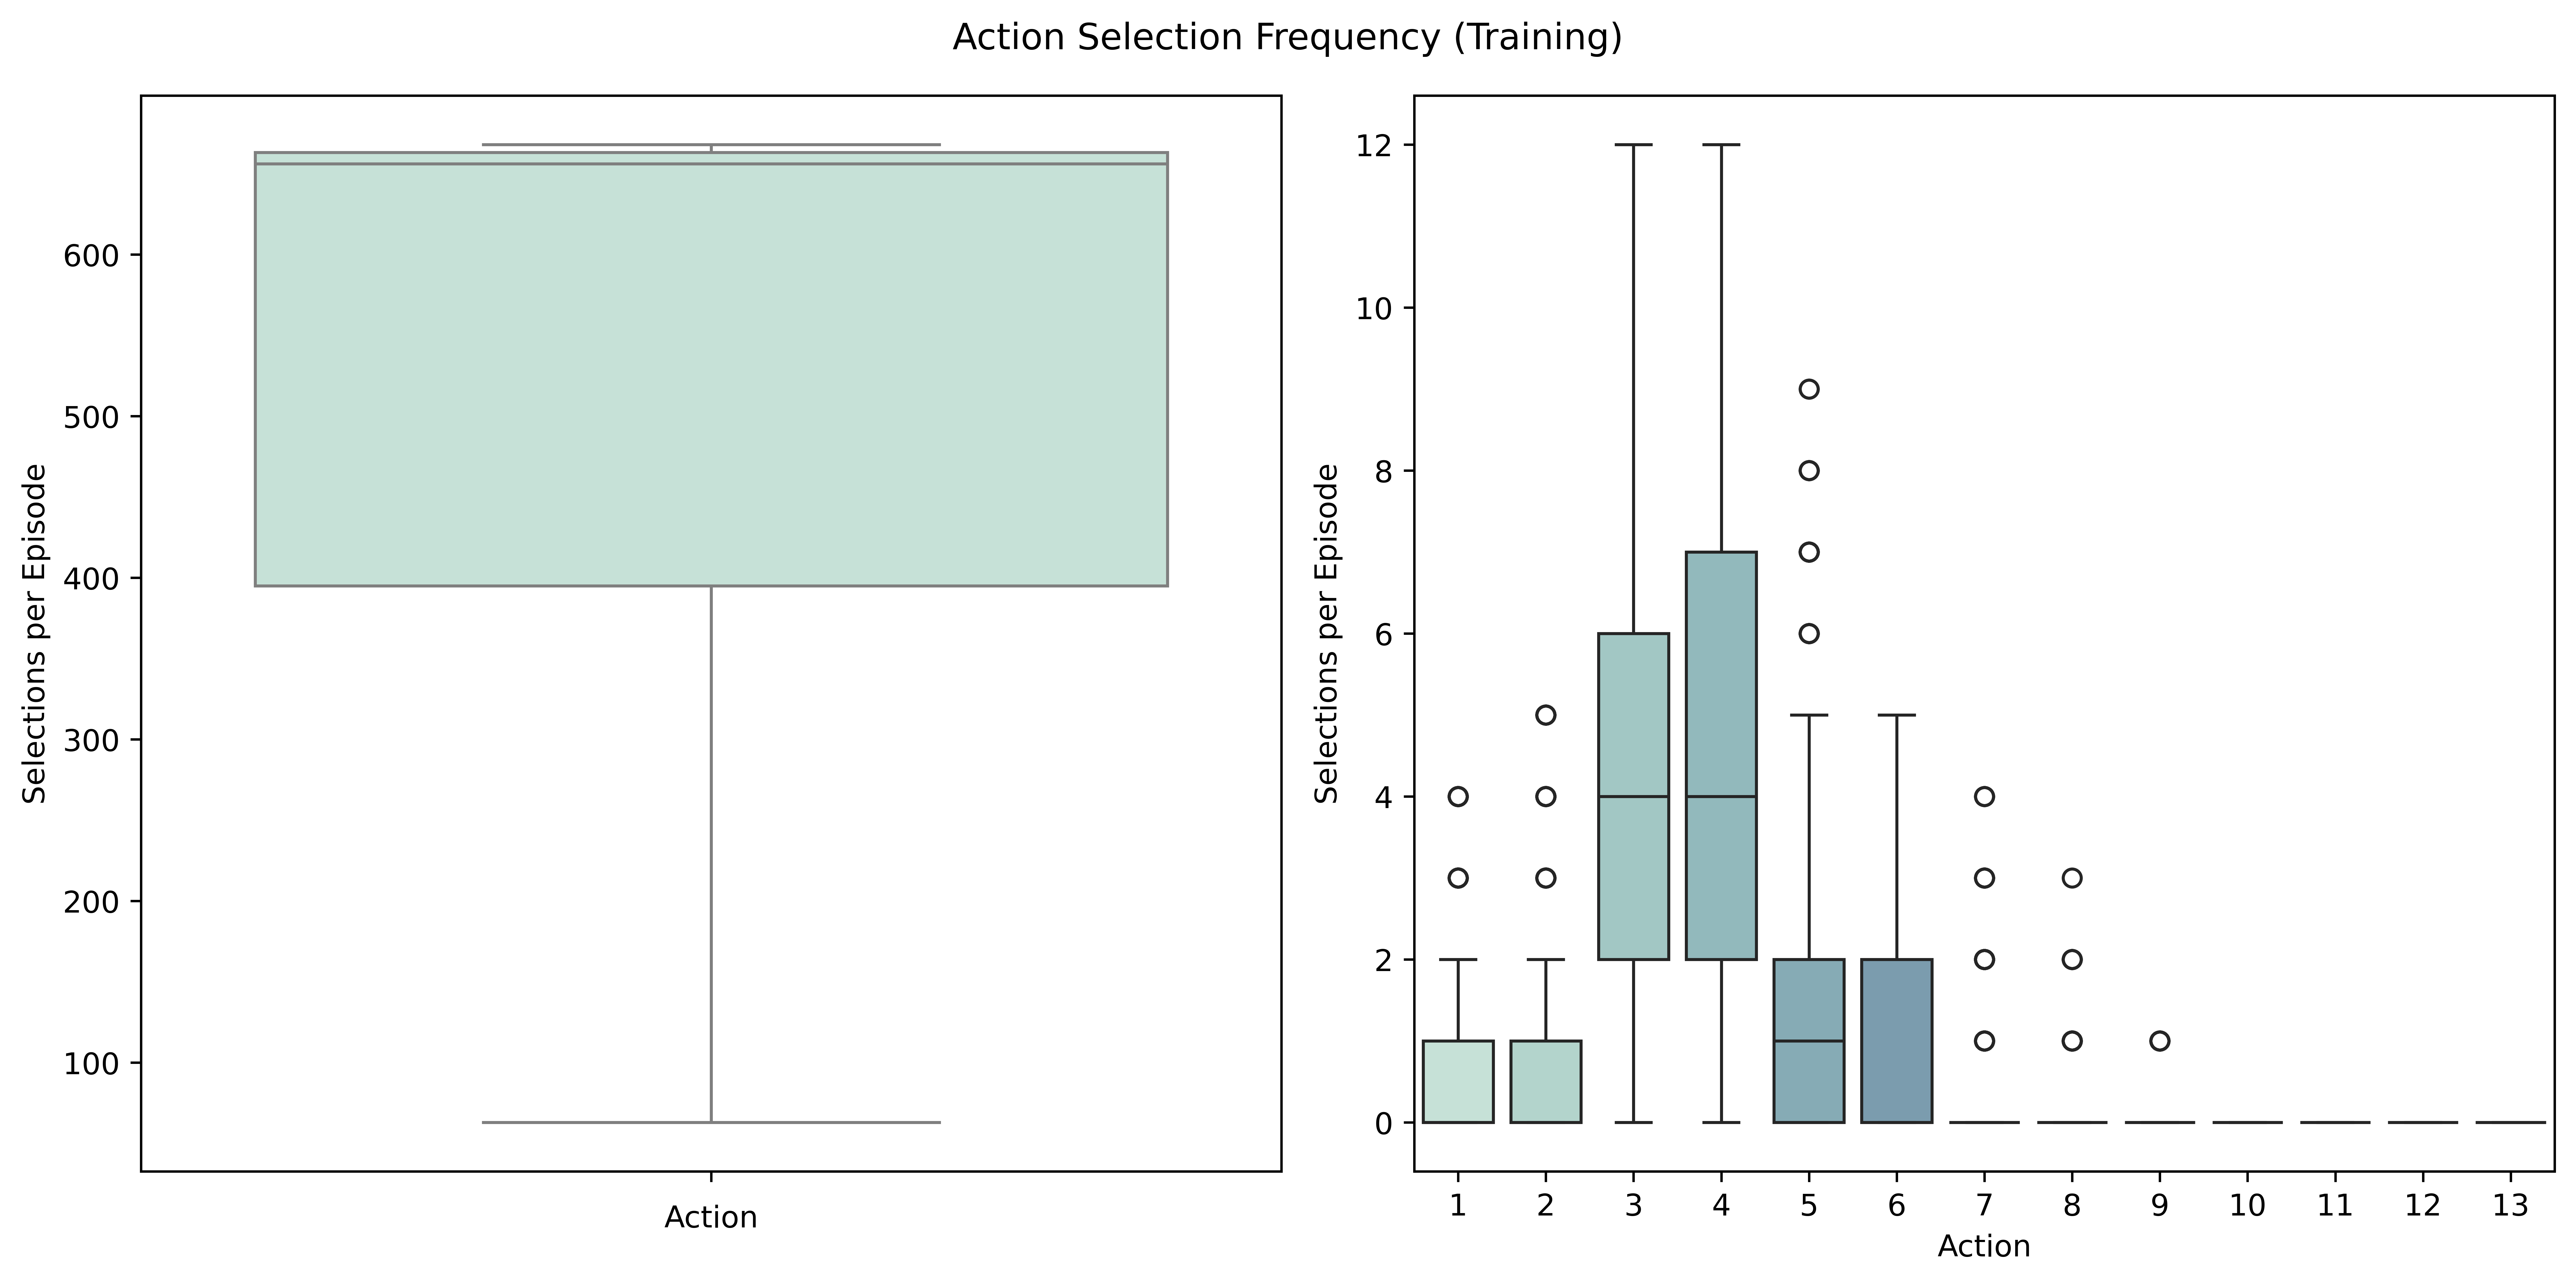

In [33]:

fig, ax = plt.subplots(1, 2)
fig.set_dpi(800)
fig.set_size_inches(12, 6)

# Apply the cubehelix palette
palette = sns.cubehelix_palette( start = .5, rot = -.5, n_colors=14, as_cmap=False)

# Prepare the data for seaborn
data_0 = train_freqs.iloc[:, 0]
data_1_13 = train_freqs.iloc[:, 1:14].melt()

# Plot using seaborn boxplot with the cubehelix palette
sns.boxplot(data=data_0, ax=ax[0], palette=palette)
sns.boxplot(x='variable', y='value', data=data_1_13, ax=ax[1], palette=palette)

# Set labels
ax[0].set_xlabel('Action')
ax[0].set_ylabel('Selections per Episode')
ax[1].set_xlabel('Action')
ax[1].set_ylabel('Selections per Episode')

# Set the title
fig.suptitle("Action Selection Frequency (Training)")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Step timing

In [22]:
from AstroCraft.PettingZoo_MA.env.CaptureTheFlagMA import CTFENVMA
from time import perf_counter_ns

In [23]:
env1 = CTFENVMA(1,1,0)
times1 = []
for ep in range(100):
    print(f"{ep}".zfill(2), end='\r')
    state, info = env1.reset()
    while True:
        t0 = perf_counter_ns()
        action0 = env1.action_space(0).sample(state['player0']['action_mask'])
        action1 = env1.action_space(1).sample(state['player1']['action_mask'])
        state, rew, term, trunc, info = env1.step({'player0': action0, 'player1': action1})
        t1 = perf_counter_ns()
        times1.append(t1-t0)
        if term['player0'] or trunc['player0'] or term['player1'] or trunc['player1']:
            break

In [24]:
env3 = CTFENVMA(3,1,0)
times3 = []
for ep in range(100):
    print(f"{ep}".zfill(2), end='\r')
    state, info = env3.reset()
    while True:
        t0 = perf_counter_ns()
        action0 = env3.action_space(0).sample(state['player0']['action_mask'])
        action1 = env3.action_space(1).sample(state['player1']['action_mask'])
        state, rew, term, trunc, info = env3.step({'player0': action0, 'player1': action1})
        t1 = perf_counter_ns()
        times3.append(t1-t0)
        if term['player0'] or trunc['player0'] or term['player1'] or trunc['player1']:
            break

In [25]:
import gymnasium as gym

In [26]:
times_dict = {
    "Asterix": [],
    "Breakout": [],
    "SpaceInvaders": [],
    "Seaquest": [],
    "Qbert": [],
    "BeamRider": [],
    "Enduro": [],
    "MsPacman": [],
    "Bowling": [],
    "Riverraid": []
}

atari_times = []

for env_n, times in times_dict.items():
    env = gym.make(f"ALE/{env_n}-v5")
    for ep in range(100):
        print(f"{env_n}: {ep}".zfill(2), end='\r')
        state, info = env.reset()
        while True:
            t0 = perf_counter_ns()
            action = env.action_space.sample()
            state, rew, term, trunc, info = env.step(action)
            t1 = perf_counter_ns()
            atari_times.append(t1-t0)
            if term or trunc:
                break

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [27]:
times_dict2 = dict()
times_dict2["1v1 AstroCraft"] = times1
times_dict2['3v3 AstroCraft'] = times3
times_dict2['Atari'] = atari_times

Text(0.5, 1.0, 'step() Execution Times for AstroCraft vs. ALE')

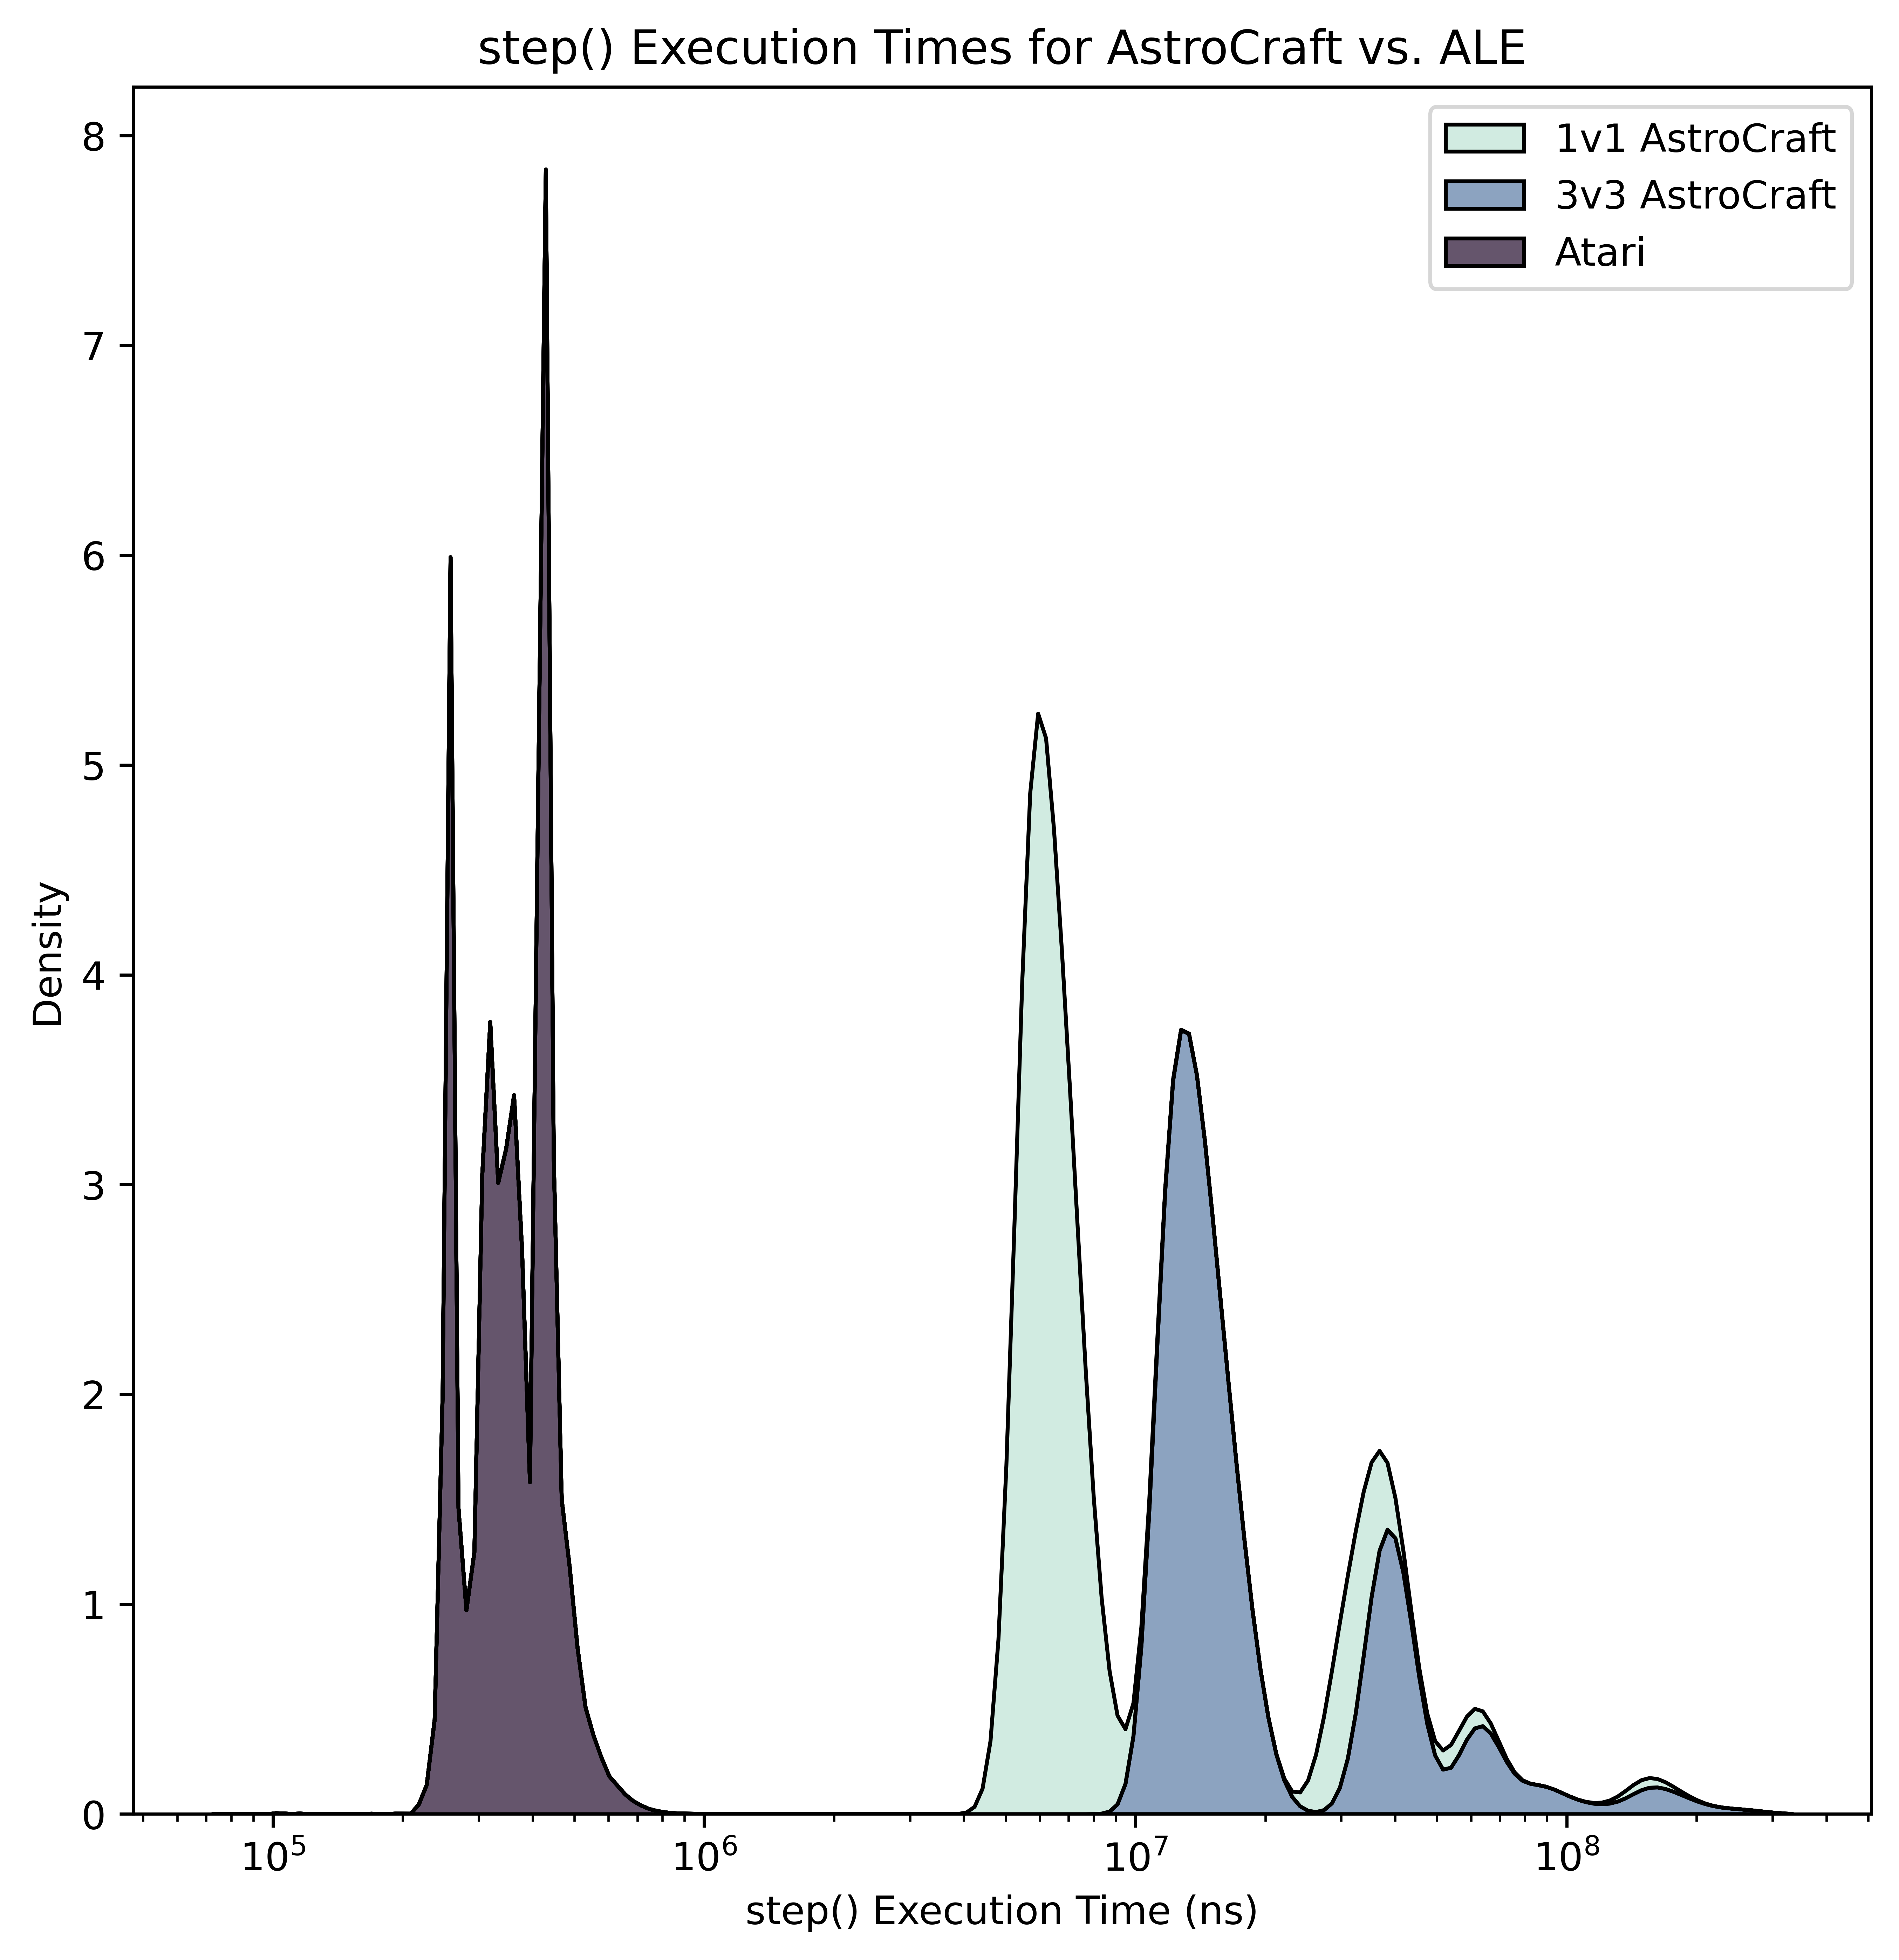

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(800)
fig.set_size_inches(8,8)
palette = sns.cubehelix_palette( start = .5, rot = -.5, n_colors=3, as_cmap=False)
sns.kdeplot(times_dict2, log_scale=True, fill=True, multiple='stack', common_norm=False, ax=ax, palette=palette)
ax.set_ylabel("Density")
ax.set_xlabel("step() Execution Time (ns)")
ax.set_title("step() Execution Times for AstroCraft vs. ALE")

Text(0.5, 0, 'step() Execution Time (ns)')

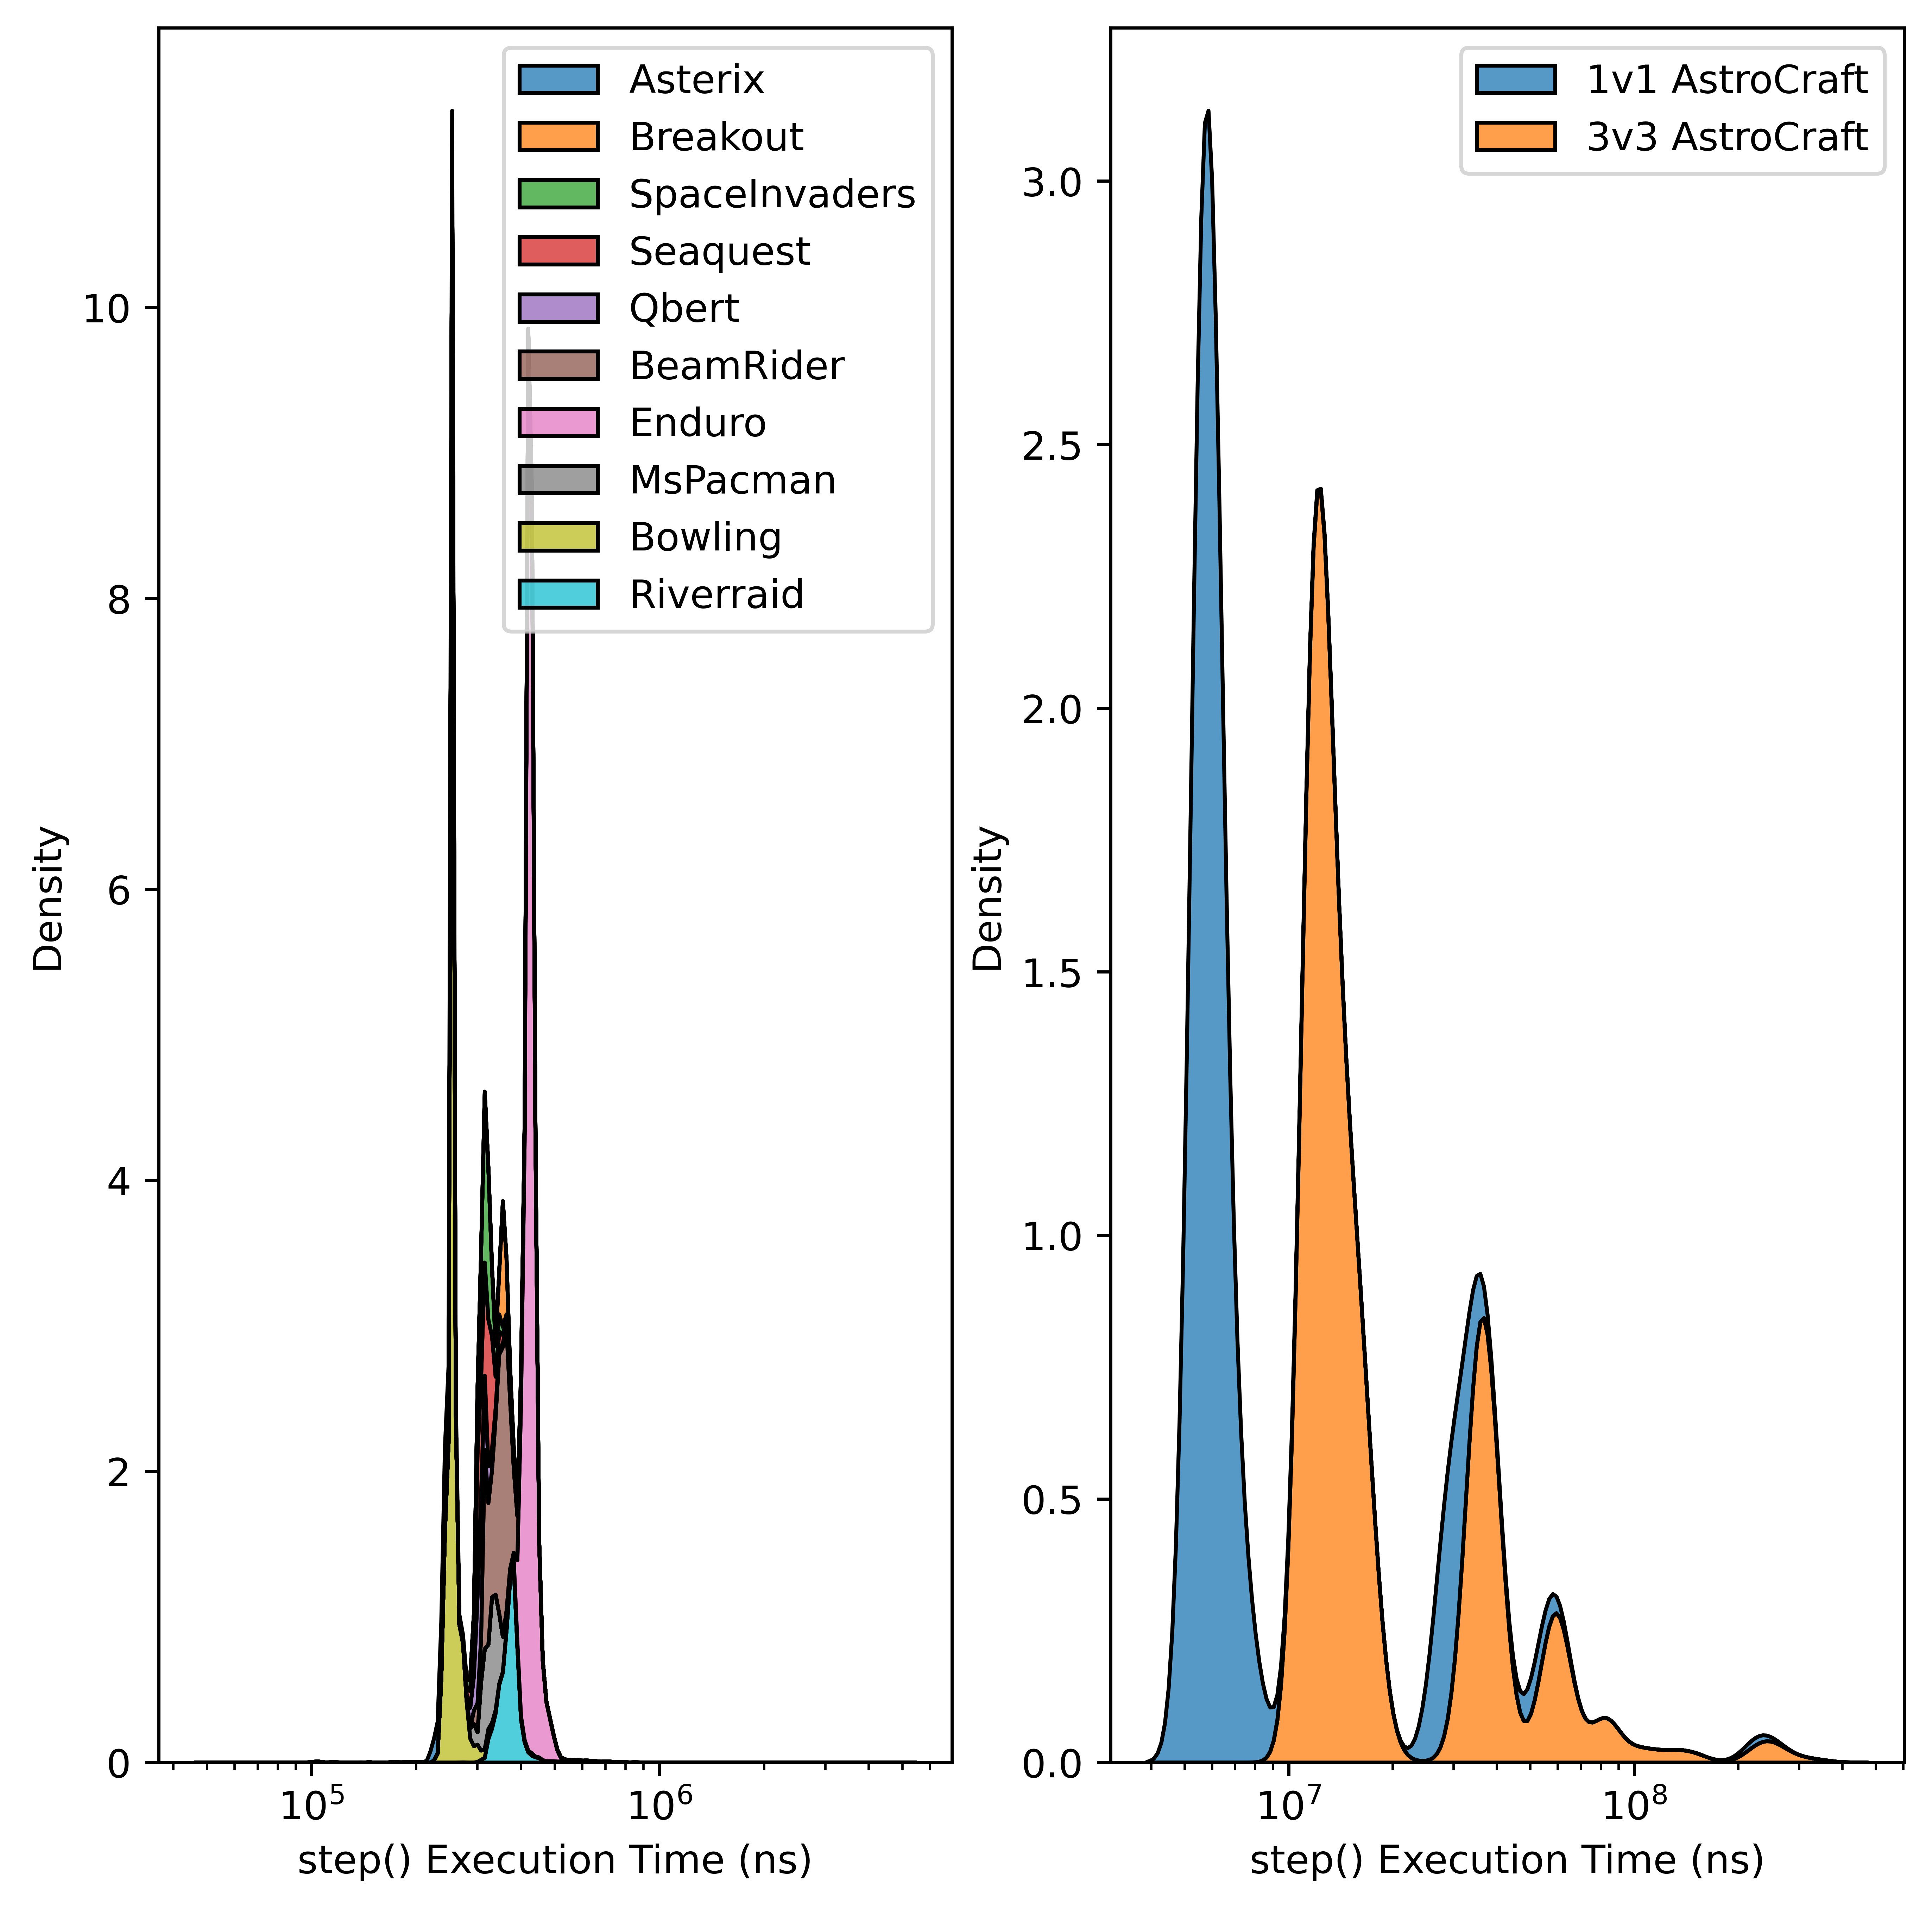

In [166]:
fig, ax = plt.subplots(1,2)
fig.set_dpi(800)
fig.set_size_inches(8,8)
keys = ["Asterix",
    "Breakout",
    "SpaceInvaders",
    "Seaquest",
    "Qbert",
    "BeamRider",
    "Enduro",
    "MsPacman",
    "Bowling",
    "Riverraid"]
sns.kdeplot({key:times_dict[key] for key in keys}, log_scale=True, fill=True, multiple='stack', common_norm=True, ax=ax[0])
sns.kdeplot({key:times_dict[key] for key in ['1v1 AstroCraft', '3v3 AstroCraft']}, log_scale=True, fill=True, multiple='stack', common_norm=True, ax=ax[1])
ax[0].set_ylabel("Density")
ax[0].set_xlabel("step() Execution Time (ns)")
ax[1].set_ylabel("Density")
ax[1].set_xlabel("step() Execution Time (ns)")